<a href="https://colab.research.google.com/github/gabrielasenareis/Portfolio/blob/main/Projeto_1_modelo_preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMO DO PROJETO**

# Declaração do problema

O dataframe contém dados de vendas de 1559 produtos em 10 lojas de diferentes cidades e inclui várias características relacionadas aos itens vendidos, características das lojas, entre outros atributos relevantes. Meu objetivo é
construir um modelo que possa prever com precisão as vendas de diferentes produtos nas diferentes lojas.

# Descrição das variáveis:

**Variáveis numéricas:**

*   **Item_Weight**: Peso do item.
*   **Item_Visibility:** A porcentagem da área total de exibição de todos os produtos em uma loja alocada para o produto em particular.
*   **Item_MRP:** Preço máximo de venda a varejo do produto.
*   **Outlet_Establishment_Year:** Ano em que a loja foi estabelecida.
*   **Item_Outlet_Sales:** Vendas do produto em uma loja específica. Esta é a variável alvo a ser predita.


**Variáveis categóricas:**


*   **Item_Identifier:** ID único do produto

*   **Item_Fat_Content:** Se o produto é baixo em gordura ou não.

*   **Item_Type:** A categoria à qual o produto pertence.

*   **Outlet_Identifier:** ID único da loja.

*   **Outlet_Size:** O tamanho da loja em termos de área coberta.

*   **Outlet_Location_Type:** O tipo de cidade onde a loja está localizada.

*   **Outlet_Type:** Se a loja é apenas uma mercearia ou algum tipo de supermercado.

# Para alcançar esse objetivo segui os seguintes passos:

**1.  Análise Exploratória de Dados (EDA):**

*  **Análise de Váriáveis:**

  Explorei os dados para verificar a presença de valores nulos e duplicados. Verifiquei também se os dados categóricos e numéricos estavam sendo lidos no dataset de acordo com seu tipo. Explorei as variáveis numéricas pra observar se existia algum valor fora do padrão. Explorei também as variáveis categóricas para verificar presença de valores sujos.

*  **Análise Univariada:**
  *  Visualizei a distribuição das variáveis numéricas e de Item_Outlet_Sales para entender a dispersão e tendência central.
  *  Visualizei a distribuição das variáveis categóricas.
    

*  **Análise Bivariada:**
  *  Plotei gráficos com a relação das variáveis numéricas com a variável alvo "Item_Outlet_Sale" para observar a correlação dessas variáveis.
  *  Criei um heatmap para confirmar as relações entre as características numéricas.

*   **Outliers:**

   Através da plotagem de boxplot observei se existia a presença de outliers no conjunto de dados.



**2.  Limpeza e Tratamento dos Dados:**

*  **Tratamento de Valores Ausentes:**

  *  Como não existiam outliers, preenchi os valores ausentes na coluna "Item_Weight" com a média da coluna.
  *  Os valores ausentes na coluna "Outlet_Size" preenchi com a moda de acordo com o "Outlet_Type".

*  **Padronização dos Dados:**

 A coluna "Item_Fat_Content" continha valores inconsistentes. Padronizei substituindo 'low fat' e 'LF' por 'Low Fat', e 'reg' por 'Regular'.

*  **Normalização dos Dados:**

 Os dados das colunas de "Item_Outlet_Sale" e 'Item_Weight' apresentaram uma distribuição assimétrica, então utilizei a transformação logarítmica pra aproximar a distribuição de uma forma mais normal.


 **3.  Codificação das Variáveis:**

  *  Os modelos de machine learning lidam apenas com dados numéricos, por isso utilizei lebel encoder para codificar as variáveis categóricas.
  
 **4.  Divisão dos Dados:**

  *  Dividi os dados em conjuntos de treinamento e teste com uma proporção de 85-15.


**5.  Treinamento do Modelo:**

*  **Treinei sete modelos diferentes de machine learning:**
  *  Regressão Linear
  *  Gradient Boosting Regressor
  *  CatBoostRegressor
  *  Ridge
  *  Árvore de regressão
  *  XGBRegressor
  *  Floresta aleatória


**6.  Avaliação do Modelo:**

  *  **Utilizei duas métricas para avaliar qual modelo teve a melhor performance:**
    *  Coeficiente de Determinação (R²)

    *  Erro Médio Absoluto (MAE)

# RESULTADO DOS MODELOS:


*  **Regressão Linear:**

  *   R²:  0.6051
  *   (MAE):  0.5140


*  **Gradient Boosting Regressor:**

  *   R²:  0.7518
  *   (MAE):  0.4025

*  **CatBoostRegressor:**

  *   R²:  0.7455
  *   (MAE):0.4078   

*  **Ridge:**

  *   R²:  0.6051
  *   (MAE): 0.5140

*  **Árvore de Regressão:**

  *   R²: 0.4843
  *   (MAE): 0.5866

*  **XGBRegressor:**

  *   R²: 0.7058
  *   (MAE): 0.4398   

*  **Random Forest:**

  *   R²:  0.7264  
  *   (MAE):  0.4281



**O Gradient Boosting Regressor e CatBoostRegressor tiveram a melhor performance, e resultados similares, mas escolhi o Gradient Boosting Regressor como melhor modelo, por uma performance levemente superior do R².**

In [31]:
#importação das bibliotecas
!pip install catboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
data = pd.read_csv('train.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Análise exploratória dos dados

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.isnull().sum()
# aqui se observa valores ausentes em item weight e outlet size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# verificando se existem duplicados
data.duplicated().sum()

0

In [10]:
#verificando se existem dados numéricos fora do padrão
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#vamos verificar agora a presença de 'dados sujos'
itemid = data['Item_Identifier'].value_counts()
itemfat = data['Item_Fat_Content'].value_counts()
itemtype = data['Item_Type'].value_counts()
outletid = data['Outlet_Identifier'].value_counts()
outletsize = data['Outlet_Size'].value_counts()
location = data['Outlet_Location_Type'].value_counts()
outlettype = data['Outlet_Type'].value_counts()

print(itemid)
print('--------------------')
print(itemfat)
print('--------------------')
print(itemtype)
print('--------------------')
print(outletid)
print('--------------------')
print(outletsize)
print('--------------------')
print(location)
print('--------------------')
print(outlettype)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
--------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

# Análise Univariada

In [12]:
colunas_numericas = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
colunas_numericas

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [13]:
colunas_categoricas = data.select_dtypes(include=['object']).columns.tolist()
colunas_categoricas

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

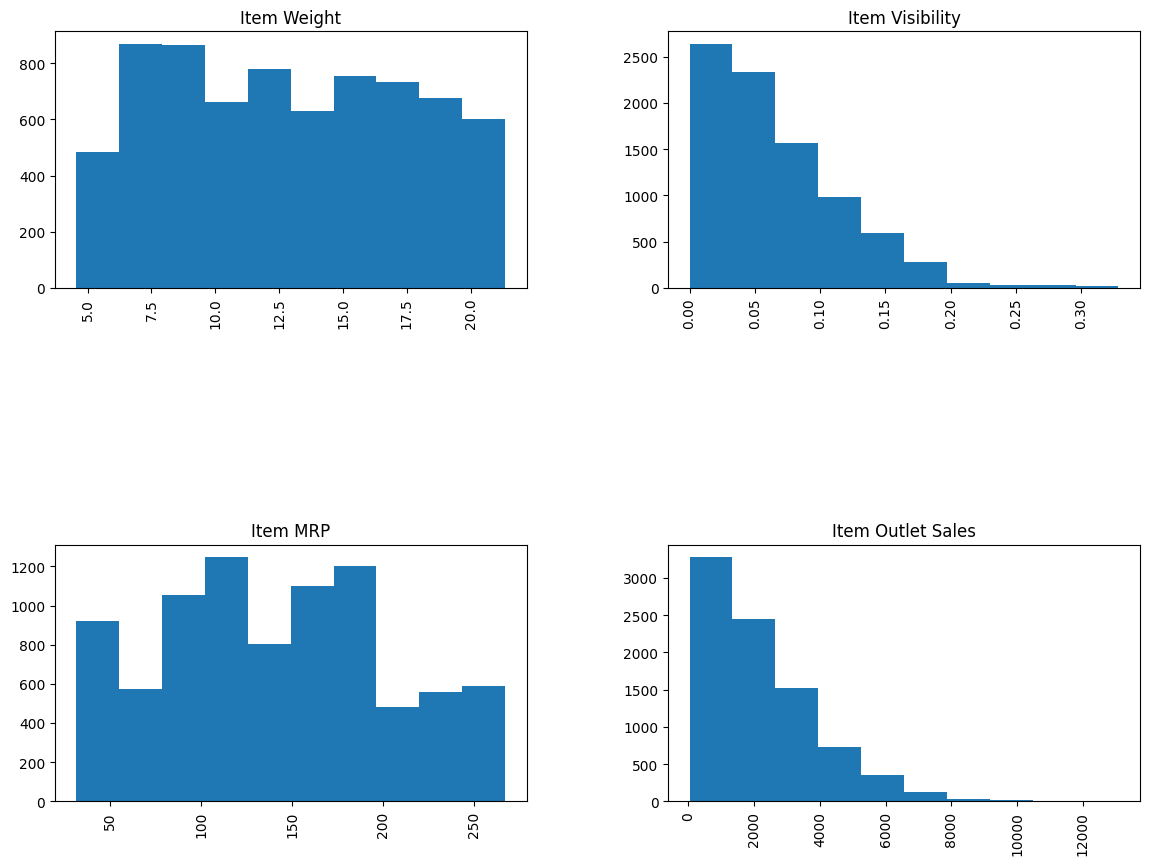

In [14]:
plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.hist(data.Item_Weight)
plt.title('Item Weight')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 2)
plt.hist(data.Item_Visibility)
plt.title('Item Visibility')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 3)
plt.hist(data.Item_MRP)
plt.title('Item MRP')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 4)
plt.hist(data.Item_Outlet_Sales)
plt.title('Item Outlet Sales')
plt.xticks(rotation='vertical')



# Ajustando espaçamento entre subplots
plt.subplots_adjust(hspace=1, wspace=0.3)

plt.show()

Observações:

*  Observei que o peso dos itens varia de 5 kg a 20 kg.

*  As características Item_Visibility e Item_Outlet_Sales são assimétricas à direita. Vou tentar fazer uma transformação com log para obter uma distribuição normal.

*  Existem mais produtos na faixa de 100 MRP a 180 MRP na característica Item_MRP.

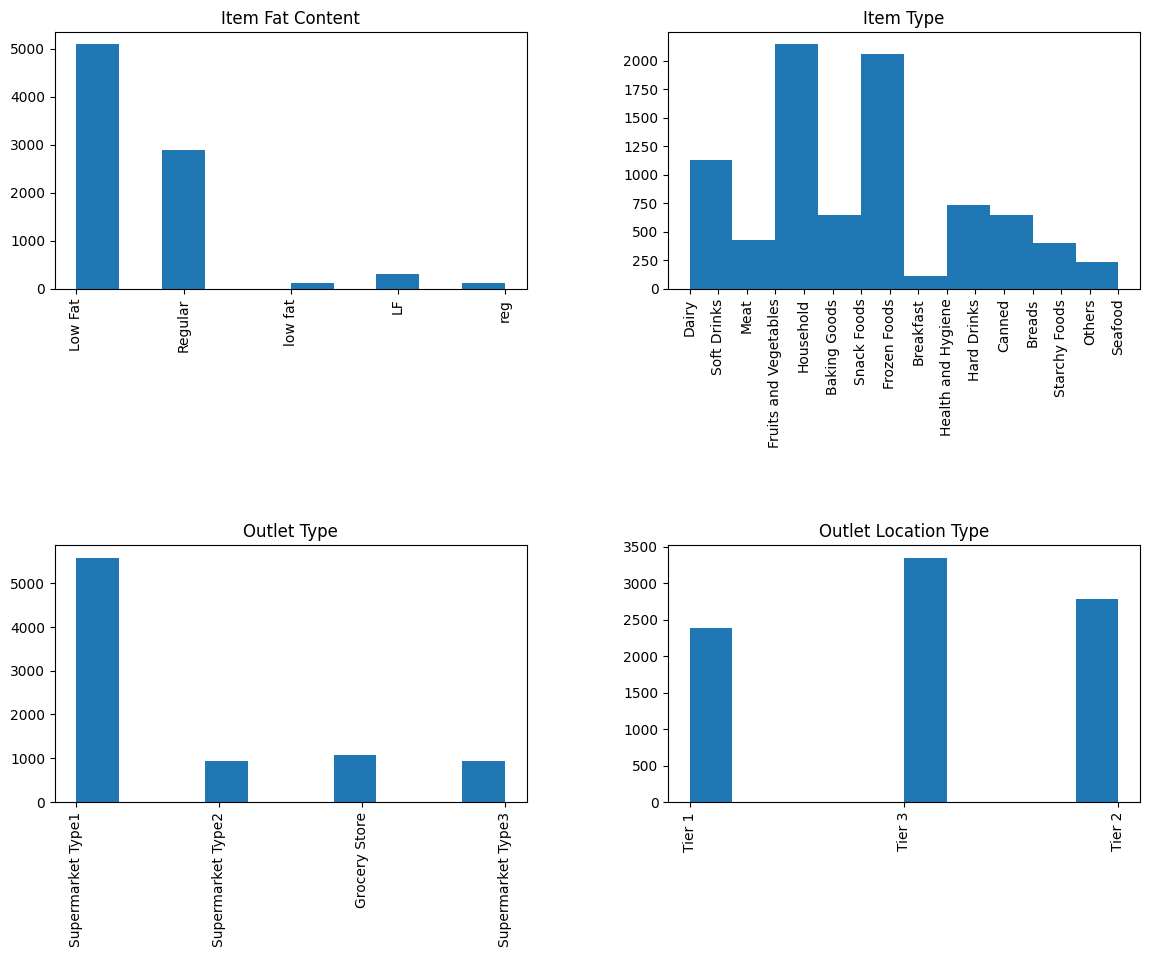

In [15]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(data.Item_Fat_Content)
plt.title('Item Fat Content')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 2)
plt.hist(data.Item_Type)
plt.title('Item Type')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 3)
plt.hist(data.Outlet_Type)
plt.title('Outlet Type')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 4)
plt.hist(data.Outlet_Location_Type)
plt.title('Outlet Location Type')
plt.xticks(rotation='vertical')




plt.subplots_adjust(hspace=1, wspace=0.3)

plt.show()


# Análise Bivariada

Text(0, 0.5, 'Item_MRP')

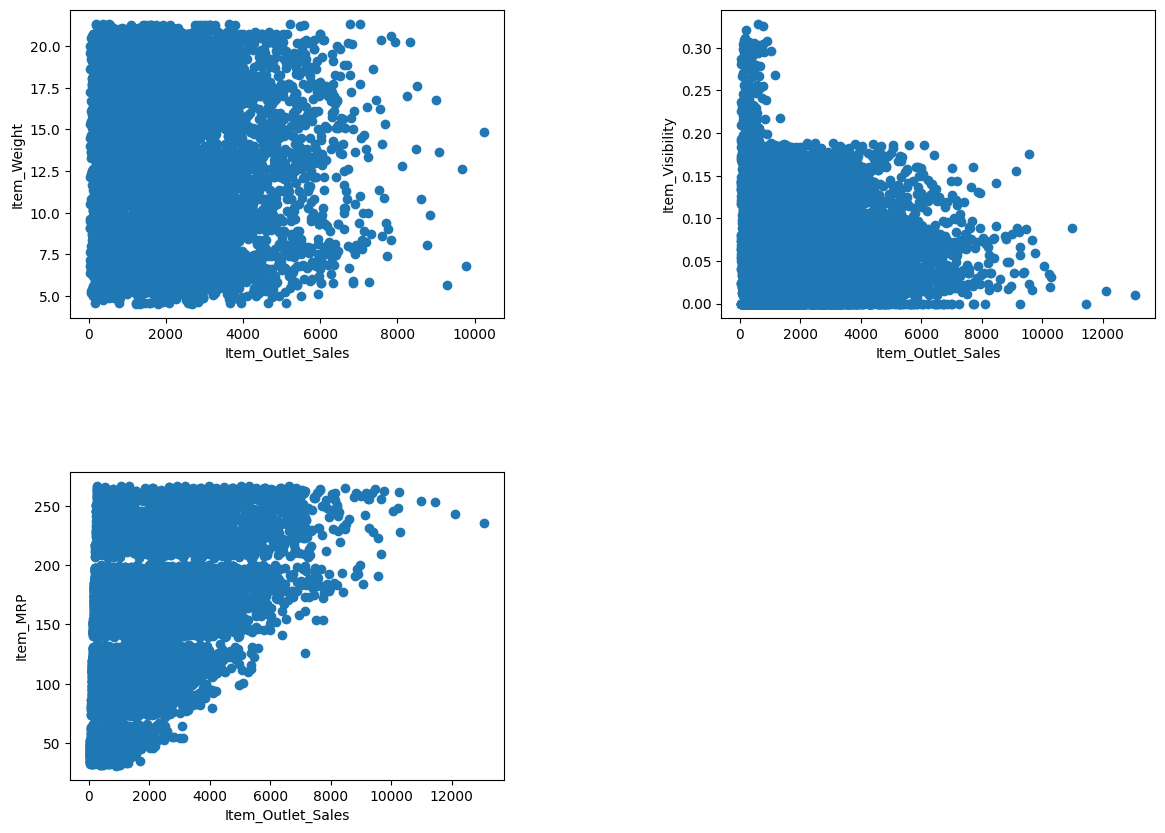

In [17]:
plt.figure(figsize=(14, 10))
plt.figure(1)

#análise de todos com a variável target "Item_Outlet_Sales" para verificar a correlação
plt.subplot(2,2,1)
plt.scatter(data.Item_Outlet_Sales, data.Item_Weight)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Weight')

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

plt.subplot(2,2,2)
plt.scatter(data.Item_Outlet_Sales, data.Item_Visibility)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Visibility')

plt.subplot(2,2,3)
plt.scatter(data.Item_Outlet_Sales, data.Item_MRP)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')


Observações:

*   Observei que não existe um padrão de vendas relacionado ao peso do produto

*   Em relação a visibilidade, ocorrem maiores vendas com até 20%

*   Aparentemente existe uma relação linear positiva entre as vendas e o 'MRP', ou seja preço máximo de varejo.

<Axes: >

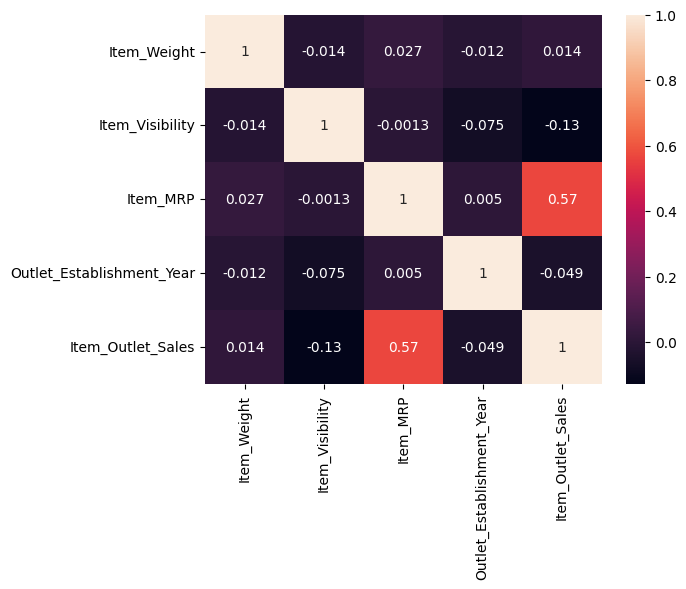

In [ ]:
sns.heatmap(data[colunas_numericas].corr(), annot=True)

*   Com o mapa de calor confirmei uma maior correlação entre as vendas e 'Item MRP'

# Análise de outliers

<Axes: >

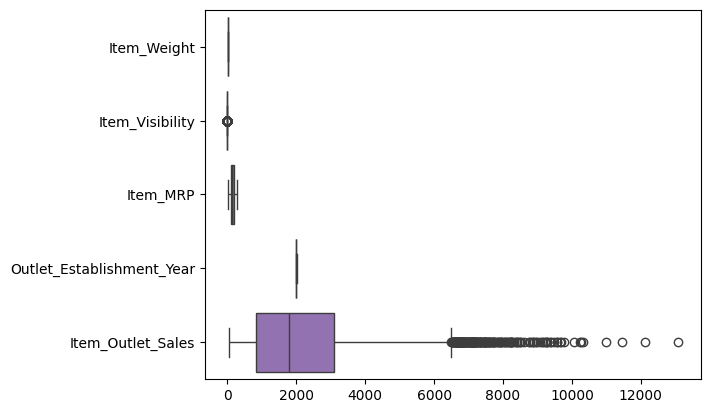

In [18]:
sns.boxplot(data = data, orient='h')

In [19]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


*   Aparentemente existem muitos 'outliers' na categoria de vendas, porém observando os valores 'mínimos' e 'máximos' percebo que não são outliers de verdade. Neste caso, se tratando de vários supermercados de variados tamanhos, existe a possibilidade de vendas discrepantes da média

# Tratamento dos dados

*  Numa análise inicial consegui observar dados nulos nas colunas "Outlet_Size" e "Item_Weight", além disso, a coluna "Item_Fat_Content" contém valores inconsistentes. Vou padronizar substituindo 'low fat' e 'LF' por 'Low Fat', e 'reg' por 'Regular'.

In [20]:
data.loc[data['Item_Fat_Content'].isin(['LF', 'low fat']), 'Item_Fat_Content'] = "Low Fat"
data.loc[data['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = "Regular"
itemfat_tratado = data['Item_Fat_Content'].value_counts()
print(itemfat_tratado)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


# Tratamento de valores ausentes

*  "Item_Weight" é uma coluna numérica e após a análise dos dados, pude ver que não há presença de outliers. Então posso substituir os valores ausentes pela sua média.
*  "Outlet_Size" é uma coluna categórica, posso usar a moda para preencher os valores ausentes, vou localizar a moda pra cada tipo de outlet, e então substituir os valores de acordo com a sua moda.

In [21]:
#substituindo item weight pela média
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [22]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [25]:
# Filtrar os dados para Supermarket Type1, Type2,Type3 e Grocery Store
supermarket1_data = data[data['Outlet_Type'] == 'Supermarket Type1']
supermarket2_data = data[data['Outlet_Type'] == 'Supermarket Type2']
supermarket3_data = data[data['Outlet_Type'] == 'Supermarket Type3']
grocery_data = data[data['Outlet_Type'] == 'Grocery Store']
# Calcular a moda de 'Outlet_Size' para cada tipo
mode_supermarket1 = supermarket1_data['Outlet_Size'].mode()[0]
mode_supermarket2 = supermarket2_data['Outlet_Size'].mode()[0]
mode_supermarket3 = supermarket3_data['Outlet_Size'].mode()[0]
mode_grocery = grocery_data['Outlet_Size'].mode()[0]

print('moda de supermarket type 1:', mode_supermarket1)
print('moda de supermarket type 2:', mode_supermarket2)
print('moda de supermarket type 3:', mode_supermarket3)
print('moda de grocery store:', mode_grocery)


moda de supermarket type 1: Small
moda de supermarket type 2: Medium
moda de supermarket type 3: Medium
moda de grocery store: Small


In [27]:
#substituindo os valores pela moda
data.loc[(data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_supermarket1
data.loc[(data['Outlet_Type'] == 'Supermarket Type2') & (data['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_supermarket2
data.loc[(data['Outlet_Type'] == 'Supermarket Type3') & (data['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_supermarket3
data.loc[(data['Outlet_Type'] == 'Grocery Store') & (data['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_grocery
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

*  Normalizando o gráfico de 'Item_Outlet_Sales' e 'Item_Weight' com log.

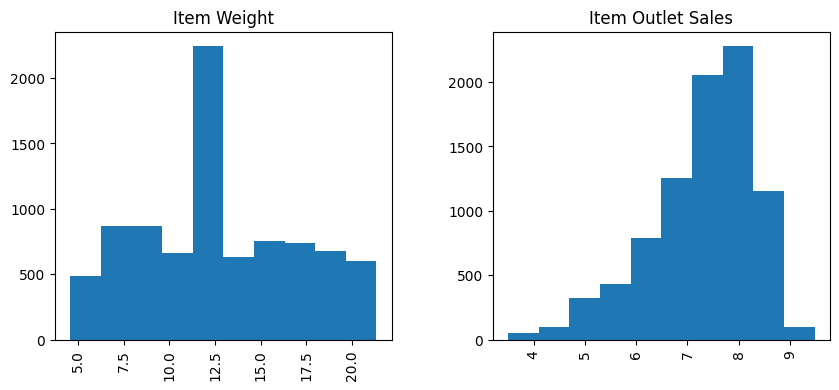

In [28]:
# em item visibility usando log acabou gerando valores infinitos, por isso vou usar o square
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

data['Item_Outlet_Sales'] = np.log(data['Item_Outlet_Sales'])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data.Item_Weight)
plt.title('Item Weight')
plt.xticks(rotation='vertical')

plt.subplot(1, 2, 2)
plt.hist(data.Item_Outlet_Sales)
plt.title('Item Outlet Sales')
plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=1, wspace=0.3)

plt.show()

# Codificando as variáveis categóricas

In [32]:
df = data.copy()
le = LabelEncoder()
for col in colunas_categoricas:
    df[col] = le.fit_transform(df[col])
df_encoded = df.astype(float)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   float64
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   float64
 10  Outlet_Type                8523 non-null   float64
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(12)
memory usage: 799.2 KB


# Pré Processamento e Modelagem

*  Separação dos dados


In [33]:
X = df_encoded.drop(columns=['Item_Outlet_Sales'])
y = df_encoded['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=42)

*  Treinamento e Avaliação do Modelo de Regressão linear

In [34]:
regressao = LinearRegression()

regressao.fit(X_train, y_train)

y_pred = regressao.predict(X_test)

score_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R²:", score_r2)
print("(MAE):", mae)

R²: 0.6051563471500601
(MAE): 0.5140526210836934


*  Treinamento e Avaliação do Modelo de Gradient Boosting Regressor

In [35]:
gradient = GradientBoostingRegressor()

gradient.fit(X_train, y_train)

y_pred_gradient = gradient.predict(X_test)

score_r2_gradient = r2_score(y_test, y_pred_gradient)
mae_gradient = mean_absolute_error(y_test, y_pred_gradient)

print("R²:", score_r2_gradient)
print("(MAE):", mae_gradient)

R²: 0.7517871763178856
(MAE): 0.40254153920360425


*  Treinamento e Avaliação do Modelo de CatBoostRegressor

In [40]:
cb = CatBoostRegressor(verbose=0)
#verbose pra suprimir as mensagens de saída do treinamento, que são extremamente extensas
cb.fit(X_train, y_train)

y_pred_cb = cb.predict(X_test)

score_r2_cb = r2_score(y_test, y_pred_cb)
mae_cb = mean_absolute_error(y_test, y_pred_cb)

print("R²:", score_r2_cb)
print("(MAE):", mae_cb)

R²: 0.7455449683665076
(MAE): 0.4078435575043861


*  Treinamento e Avaliação do Modelo de Ridge

In [37]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

score_r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("R²:", score_r2_ridge)
print("(MAE):", mae_ridge)

R²: 0.6051385637687225
(MAE): 0.5140474396328238


*  Treinamento e Avaliação do Modelo de Árvore de regressão

In [38]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

score_r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("R² :", score_r2_dt)
print("(MAE):", mae_dt)

R² : 0.47759293671414893
(MAE): 0.5868006095852754


*  Treinamento e Avaliação do Modelo de XGBRegressor

In [39]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

score_r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("R²:", score_r2_xgb)
print("(MAE):", mae_xgb)

R²: 0.7058924163320872
(MAE): 0.4398395599836176


*  Treinamento e Avaliação do Modelo de Floresta aleatória

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

score_r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("R² (rf):", score_r2_rf)
print("(MAE) (rf):", mae_rf)

R² (rf): 0.7213721787174474
(MAE) (rf): 0.43145860455192037
